# Machine Learing

## Supervised Learning

### Regression

- Linear/Logistic Regression
- SVM
- Artificial Neural Network(ANN) - Deep Learning

### Tree

- Decision Tree
- Random Forest (+ Bagging)
- GBMC (+Boosting)

## Unsupervised Learning

--------

## Generate Dataset

In [1]:
import numpy as np

# Feature
x = np.random.uniform(low=0.0, high=1.0, size=100)

print(x.shape)
x[0:10]

(100,)


array([ 0.60400253,  0.07075573,  0.69562433,  0.35100997,  0.67721794,
        0.51425808,  0.25992823,  0.8636763 ,  0.67382303,  0.37800601])

In [2]:
# Label
y = 0.3 * x

print(y.shape)
y[0:10]

(100,)


array([ 0.18120076,  0.02122672,  0.2086873 ,  0.10530299,  0.20316538,
        0.15427742,  0.07797847,  0.25910289,  0.20214691,  0.1134018 ])

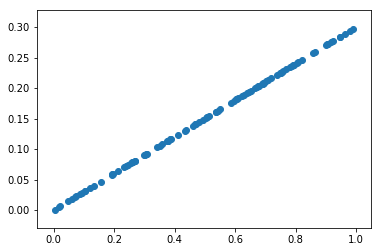

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.scatter(x, y)

## Random Search

In [4]:
num_epoch = 100

best_error = 9999
best_w = None
best_epoch = None

for epoch in range(num_epoch):
    w = np.random.uniform(low=0.0, high=1.0)
    y_predict = w * x
    
    error = np.abs(y_predict - y).mean()
    
    if error < best_error:
        best_error = error
        best_w = w
        best_epoch = epoch
        
        print(f"{epoch:2}, w = {w:.6f}, error = {error:.6f}")
        
print('----' * 10)
print(f"{best_epoch:2}, w = {best_w:.6f}, error = {best_error:.6f}")

 0, w = 0.319293, error = 0.009829
26, w = 0.299511, error = 0.000249
----------------------------------------
26, w = 0.299511, error = 0.000249


## h-step Search

In [5]:
num_epoch = 100
h = 0.03

w = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w * x
    
    current_error = np.abs(y_predict - y).mean()
    
    y_predict = (w + h) * x
    h_plus_error = np.abs(y_predict - y).mean()
    
    if h_plus_error < current_error:
        w = w + h
        
        print(f"{epoch:2} w = {w:.6f}, error = {h_plus_error:.6f}")
        continue
        
    y_predict = (w - h) * x
    h_minus_error = np.abs(y_predict - y).mean()
    
    if h_minus_error < current_error:
        w = w - h
        print(f"{epoch:2} w = {w:.6f}, error = {h_minus_error:.6f}")
        continue
    break
    
print(f"{epoch:2} w = {w:.6f}, error = {current_error:.6f}")

 0 w = 0.894090, error = 0.302648
 1 w = 0.864090, error = 0.287365
 2 w = 0.834090, error = 0.272082
 3 w = 0.804090, error = 0.256799
 4 w = 0.774090, error = 0.241516
 5 w = 0.744090, error = 0.226234
 6 w = 0.714090, error = 0.210951
 7 w = 0.684090, error = 0.195668
 8 w = 0.654090, error = 0.180385
 9 w = 0.624090, error = 0.165102
10 w = 0.594090, error = 0.149819
11 w = 0.564090, error = 0.134536
12 w = 0.534090, error = 0.119253
13 w = 0.504090, error = 0.103970
14 w = 0.474090, error = 0.088687
15 w = 0.444090, error = 0.073404
16 w = 0.414090, error = 0.058121
17 w = 0.384090, error = 0.042838
18 w = 0.354090, error = 0.027555
19 w = 0.324090, error = 0.012272
20 w = 0.294090, error = 0.003011
21 w = 0.294090, error = 0.003011


## Gradient Descent(not yet)

In [6]:
num_epoch = 100

w = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w * x
    error = np.abs(y_predict - y).mean()
    
    w = w - (y_predict - y).mean()
    
    if error < 0.05:
        break
        
    print(f"{epoch:2} w = {w:.6f}, error = {error:.6f}")
    
print('----' * 10)
print(f"{epoch:2} w = {w:.6f}, error = {error:.6f}")

 0 w = 0.510543, error = 0.218640
 1 w = 0.403286, error = 0.107258
 2 w = 0.350669, error = 0.052617
----------------------------------------
 3 w = 0.324856, error = 0.025812


-------

## Generate Dataset - 2 factors

In [7]:
x1 = np.random.uniform(low=0.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([ 0.20507918,  0.57913602,  0.06536204,  0.26355649,  0.55902324,
        0.1129681 ,  0.01637194,  0.6763658 ,  0.84607436,  0.84442787])

In [8]:
x2 = np.random.uniform(low=0.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([ 0.19412196,  0.07769054,  0.36314842,  0.58720033,  0.67302214,
        0.32299989,  0.54056216,  0.57671332,  0.36213889,  0.37452512])

In [9]:
y = 0.3 * x1 + 0.5 * x2

print(y.shape)
y[0:10]

(100,)


array([ 0.15858473,  0.21258607,  0.20118282,  0.37266711,  0.50421804,
        0.19539038,  0.27519266,  0.4912664 ,  0.43489175,  0.44059092])

## Random Search

In [10]:
num_epoch = 100

best_error = 9999
best_w1 = None
best_w2 = None
best_epoch = None

for epoch in range(num_epoch):
    w1 = np.random.uniform(low=0.0, high=1.0)
    w2 = np.random.uniform(low=0.0, high=1.0)

    y_predict = w1 * x1 + w2 * x2
    
    error = np.abs(y_predict - y).mean()
    
    if error < best_error:
        best_error = error
        best_w1 = w1
        best_w2 = w2
        best_epoch = epoch
        
    print(f"{epoch:2}, w1 = {w1:.6f}, w2 = {w2:.6f}, error = {error:.6f}")
    
print('----' * 10)
print(f"{best_epoch:2}, w1 = {best_w1:.6f}, w2 = {best_w2:.6f}, error = {best_error:.6f}")

 0, w1 = 0.945032, w2 = 0.316146, error = 0.242433
 1, w1 = 0.278087, w2 = 0.611331, error = 0.045003
 2, w1 = 0.824798, w2 = 0.909579, error = 0.445228
 3, w1 = 0.791908, w2 = 0.995558, error = 0.471032
 4, w1 = 0.859315, w2 = 0.882019, error = 0.448296
 5, w1 = 0.893678, w2 = 0.296496, error = 0.214700
 6, w1 = 0.480633, w2 = 0.784369, error = 0.222223
 7, w1 = 0.861347, w2 = 0.610824, error = 0.318803
 8, w1 = 0.823303, w2 = 0.528865, error = 0.261385
 9, w1 = 0.612434, w2 = 0.557683, error = 0.175516
10, w1 = 0.536411, w2 = 0.548078, error = 0.134940
11, w1 = 0.269159, w2 = 0.384083, error = 0.070347
12, w1 = 0.906590, w2 = 0.406433, error = 0.250111
13, w1 = 0.837972, w2 = 0.398292, error = 0.215755
14, w1 = 0.841919, w2 = 0.668763, error = 0.337485
15, w1 = 0.607760, w2 = 0.104364, error = 0.124480
16, w1 = 0.307531, w2 = 0.832355, error = 0.163436
17, w1 = 0.610090, w2 = 0.063523, error = 0.136498
18, w1 = 0.585583, w2 = 0.339137, error = 0.092121
19, w1 = 0.334645, w2 = 0.57457

## Gradient Descent(not yet)

In [11]:
num_epoch = 100

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2
    error = np.abs(y_predict - y).mean()
    
    if error < 0.05:
        break
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
        
    print(f"{epoch:2}, w1 = {w1:.6f}, w2 = {w2:.6f}, error = {error:.6f}")
    
print('----' * 10)
print(f"{best_epoch:2}, w1 = {best_w1:.6f}, w2 = {best_w2:.6f}, error = {best_error:.6f}")

 0, w1 = 0.304822, w2 = 0.664903, error = 0.172329
 1, w1 = 0.266743, w2 = 0.613438, error = 0.081605
----------------------------------------
89, w1 = 0.309575, w2 = 0.475435, error = 0.008600


----

## Generate Dataset - 2 factors + 1 bias

In [12]:
x1 = np.random.uniform(low=0.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([ 0.49200526,  0.66501136,  0.48141751,  0.14643528,  0.90404957,
        0.80928262,  0.95430028,  0.45938196,  0.982184  ,  0.05141254])

In [13]:
x2 = np.random.uniform(low=0.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([ 0.52722281,  0.3566    ,  0.02344097,  0.89033687,  0.81784016,
        0.09958839,  0.76972724,  0.09487807,  0.39102675,  0.11220865])

In [14]:
y = 0.3 * x1 + 0.5 * x2 + 0.1

print(y.shape)
y[0:10]

(100,)


array([ 0.51121298,  0.47780341,  0.25614574,  0.58909902,  0.78013495,
        0.39257898,  0.7711537 ,  0.28525362,  0.59016857,  0.17152809])

## Random Search

In [15]:
num_epoch = 100

best_error = 9999
best_w1 = None
best_w2 = None
best_b = None
best_epoch = None

for epoch in range(num_epoch):
    w1 = np.random.uniform(low=0.0, high=1.0)
    w2 = np.random.uniform(low=0.0, high=1.0)
    b = np.random.uniform(low=0.0, high=1.0)
    
    y_predict = w1 * x1 + w2 * x2 + b
    
    error = np.abs(y_predict - y).mean()
    
    if error < best_error:
        best_error = error
        best_w1 = w1
        best_w2 = w2
        best_b = b
        best_epoch = epoch
        
    print(f"{epoch:2}, w1 = {w1:.6f}, w2 = {w2:.6f}, b: {b:.6f} error = {error:.6f}")
    
print('----' * 10)
print(f"{best_epoch:2}, w1 = {best_w1:.6f}, w2 = {best_w2:.6f}, b = {best_b:.6f}, error = {best_error:.6f}")

 0, w1 = 0.222928, w2 = 0.762226, b: 0.889181 error = 0.884279
 1, w1 = 0.502898, w2 = 0.846876, b: 0.005991 error = 0.183052
 2, w1 = 0.366304, w2 = 0.662609, b: 0.430829 error = 0.444885
 3, w1 = 0.575031, w2 = 0.399384, b: 0.275429 error = 0.257446
 4, w1 = 0.774872, w2 = 0.705151, b: 0.952762 error = 1.185536
 5, w1 = 0.330703, w2 = 0.513458, b: 0.842196 error = 0.763809
 6, w1 = 0.282553, w2 = 0.826085, b: 0.955139 error = 1.011243
 7, w1 = 0.181242, w2 = 0.474706, b: 0.667795 error = 0.497698
 8, w1 = 0.724231, w2 = 0.117998, b: 0.319041 error = 0.241776
 9, w1 = 0.849419, w2 = 0.125424, b: 0.981324 error = 0.957585
10, w1 = 0.007311, w2 = 0.952601, b: 0.714961 error = 0.702015
11, w1 = 0.610625, w2 = 0.752152, b: 0.802840 error = 0.980031
12, w1 = 0.953276, w2 = 0.262124, b: 0.924459 error = 1.019834
13, w1 = 0.105157, w2 = 0.725975, b: 0.216075 error = 0.138855
14, w1 = 0.044297, w2 = 0.905042, b: 0.324513 error = 0.305527
15, w1 = 0.483860, w2 = 0.356779, b: 0.210127 error = 0

## Gradient Descent(not yet)

In [29]:
num_epoch = 100

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b
    error = np.abs(y_predict - y).mean()
    
    if error < 0.005:
        break
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean() # y = 0.3 * x1 + 0.5 * x2 + 0.1 * (1.0) 이라고 가정
    
    print(f"{epoch:2}, w1 = {w1:.6f}, w2 = {w2:.6f}, b = {b:.6f}, error = {error:.6f}")
    
print('----' * 10)
print(f"{epoch:2}, w1 = {best_w1:.6f}, w2 = {best_w2:.6f}, b = {best_b:.6f}, error = {best_error:.6f}")

 0, w1 = 0.220519, w2 = 0.390435, b = -0.070469, error = 0.513079
 1, w1 = 0.354122, w2 = 0.533221, b = 0.193654, error = 0.264123
 2, w1 = 0.284025, w2 = 0.461460, b = 0.057108, error = 0.136546
 3, w1 = 0.319057, w2 = 0.500162, b = 0.127158, error = 0.070050
 4, w1 = 0.299986, w2 = 0.481775, b = 0.090718, error = 0.036440
 5, w1 = 0.308899, w2 = 0.492694, b = 0.109202, error = 0.018484
 6, w1 = 0.303466, w2 = 0.488388, b = 0.099390, error = 0.009812
 7, w1 = 0.305505, w2 = 0.491825, b = 0.104185, error = 0.005010
----------------------------------------
 8, w1 = 0.265252, w2 = 0.328793, b = 0.178161, error = 0.049488


## Gradient Descent

In [36]:
num_epoch = 100
learning_rate = 0.4

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b
    error = np.abs(y_predict - y).mean()
    
    if error < 0.005:
        break
    
    w1 = w1 - learning_rate * ((y_predict - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_predict - y) * x2).mean()
    b = b - learning_rate * (y_predict - y).mean() # y = 0.3 * x1 + 0.5 * x2 + 0.1 * (1.0) 이라고 가정
    
    print(f"{epoch:2}, w1 = {w1:.6f}, w2 = {w2:.6f}, b = {b:.6f}, error = {error:.6f}")
    
print('----' * 10)
print(f"{epoch:2}, w1 = {best_w1:.6f}, w2 = {best_w2:.6f}, b = {best_b:.6f}, error = {best_error:.6f}")

 0, w1 = 0.609965, w2 = 0.497937, b = 0.376940, error = 1.080176
 1, w1 = 0.518170, w2 = 0.412211, b = 0.206721, error = 0.425548
 2, w1 = 0.478982, w2 = 0.381484, b = 0.139618, error = 0.167757
 3, w1 = 0.460607, w2 = 0.372310, b = 0.113126, error = 0.075934
 4, w1 = 0.450523, w2 = 0.371524, b = 0.102630, error = 0.052355
 5, w1 = 0.443795, w2 = 0.373943, b = 0.098439, error = 0.046832
 6, w1 = 0.438477, w2 = 0.377531, b = 0.096735, error = 0.044728
 7, w1 = 0.433800, w2 = 0.381488, b = 0.096016, error = 0.043218
 8, w1 = 0.429459, w2 = 0.385504, b = 0.095689, error = 0.041798
 9, w1 = 0.425331, w2 = 0.389458, b = 0.095520, error = 0.040424
10, w1 = 0.421363, w2 = 0.393306, b = 0.095418, error = 0.039092
11, w1 = 0.417535, w2 = 0.397034, b = 0.095347, error = 0.037803
12, w1 = 0.413833, w2 = 0.400639, b = 0.095291, error = 0.036557
13, w1 = 0.410253, w2 = 0.404121, b = 0.095245, error = 0.035352
14, w1 = 0.406787, w2 = 0.407484, b = 0.095206, error = 0.034186
15, w1 = 0.403434, w2 = 0

------

# Single-Layer Neural Network

x = feature
y = label
m = # of data

w = weight
b = bias

h(x) = w*x + b

Loss Function
L(y, h(x)) = (h(x) - y)^2) / 2

Const Function
J(w, b) = ( Sigma(1~100) L(y[i], h(x[i]) ) / m